In [1]:
import argparse
import sys
import os
import pyautogui
from datetime import datetime


import tensorflow as tf
import tensorboard


import numpy as np
import math
import matplotlib.pyplot as plt
from skimage.transform import resize


from tensorflow import keras
from keras import backend as K
from tensorflow.keras import models
from tensorflow.keras.models import load_model, Sequential
from tensorflow.keras import layers
from tensorflow.keras.layers import Dense, Flatten, Input, Activation, UpSampling2D
from tensorflow.keras.layers import Conv2D, MaxPooling2D
from tensorflow.keras.layers import BatchNormalization
from tensorflow.keras import optimizers
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping


import keras_Model_Ablation
# import keras_Model_Ablation_test

2.1.0


Using TensorFlow backend.


In [2]:
# for system print
sys_stdout_backup = sys.stdout

save_path = '/Users/wlgns/Desktop/save/'
# VGG19 VGG16 ResNet50 ResNet50V2 ResNet101 ResNet101V2 ResNet152 ResNet152V2 MobileNet MobileNetV2
# model_name = 'VGG19'
# model_name = ['VGG19', 'VGG16', 'ResNet50', 'ResNet101', 'ResNet152', 'MobileNetV3','AlexNet']
model_name = ['VGG19', 'ResNet152', 'MobileNetV3']
data_name = 'MNIST'
image_size = 64
channels = 1
batch = 16
epoch = 20
# epoch = 1
n_classes = 10

# ###############
# img_size = image_size
# ch = channels

ab_types = ['filt','block','fc']

VGG19_ablation_filt = [4, 8]
# VGG19_ablation_filt = [2, 1, 1/2, 1/4, 1/8, 1/16, 1/32, 1/64]
VGG19_ablation_block = [1, 2, 3, 4, 5, 6]
VGG19_ablation_fc = [1, 2, 3, 4, 5, 6]

MobileNetV3_ablation_filt = [2, 1, 1/2, 1/4, 1/8, 1/16, 1/32]
MobileNetV3_ablation_block = [2, 3, 4, 5, 6]
MobileNetV3_ablation_fc = [1, 2, 3, 4, 5, 6]

# ResNet152_ablation_filt = [8, 4, 2, 1, 1/2, 1/4, 1/8, 1/16, 1/32]
ResNet152_ablation_filt = [1/32, 1/16, 1/8, 1/4, 1/2, 1, 2, 4]
# ResNet152_ablation_block = [2, 3, 4, 5, 6]
# ResNet152_ablation_fc = [1, 2, 3, 4, 5, 6]

In [3]:
for model_name_elem in model_name:
    print(model_name_elem)
print("")

for model_name_elem in ResNet152_ablation_filt:
    print(model_name_elem)

# for model_name_elem in VGG19_ablation_block:
#     print(model_name_elem)
# print("")

# for model_name_elem in VGG19_ablation_fc:
#     print(model_name_elem)
# print("")

VGG19
ResNet152
MobileNetV3

0.03125
0.0625
0.125
0.25
0.5
1
2
4


In [4]:
### save Path
if(os.path.isdir(save_path) != True):
    os.mkdir(save_path)
if(os.path.isdir(save_path + 'keras/') != True):
    os.mkdir(save_path + 'keras/')  

ResNet152_MNIST64_b16_ep20_fi0.03125_bl5_fc0 - start date and time : 2020-09-24 20:59:49.913628
[Load data. Done.] 
[Load Model. Done.] 
[Model Complie. Done.] 
[Training. Done.] 

loss_and_metrics : [5.3086317363739015, 0.1001]


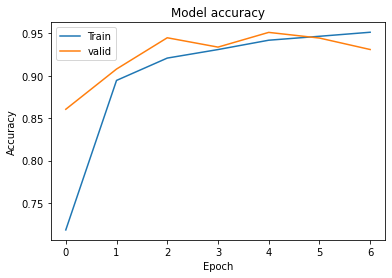

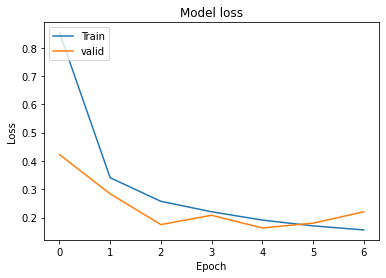

model Start date and time : 2020-09-24 20:59:49.915632
finish training date and time : 2020-09-24 21:28:52.424312
finish evaluation date and time : 2020-09-24 21:29:04.985305
save history date and time : 2020-09-24 21:29:05.619317
ResNet152_MNIST64_b16_ep20_fi0.03125_bl5_fc0 - finish date and time : 2020-09-24 21:29:05.624311

ResNet152_MNIST64_b16_ep20_fi0.0625_bl5_fc0 - start date and time : 2020-09-24 21:29:05.624311
[Load data. Done.] 
[Load Model. Done.] 
[Model Complie. Done.] 
[Training. Done.] 

loss_and_metrics : [5.399596532821655, 0.1027]


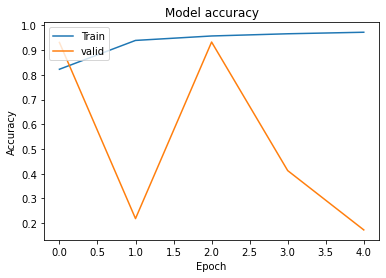

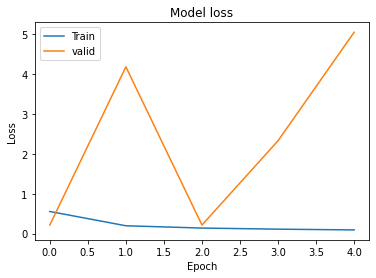

model Start date and time : 2020-09-24 21:29:05.627310
finish training date and time : 2020-09-24 21:51:17.791483
finish evaluation date and time : 2020-09-24 21:51:30.570478
save history date and time : 2020-09-24 21:51:31.201475
ResNet152_MNIST64_b16_ep20_fi0.0625_bl5_fc0 - finish date and time : 2020-09-24 21:51:31.243474

ResNet152_MNIST64_b16_ep20_fi0.125_bl5_fc0 - start date and time : 2020-09-24 21:51:31.243474
[Load data. Done.] 
[Load Model. Done.] 
[Model Complie. Done.] 
[Training. Done.] 

loss_and_metrics : [5.073094111251831, 0.097]


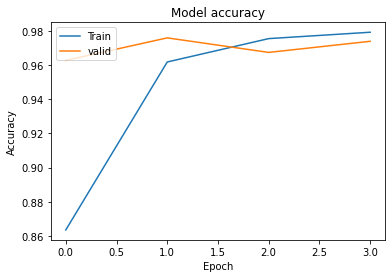

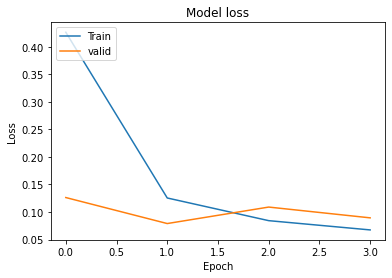

model Start date and time : 2020-09-24 21:51:31.246476
finish training date and time : 2020-09-24 22:09:11.357988
finish evaluation date and time : 2020-09-24 22:09:24.609978
save history date and time : 2020-09-24 22:09:25.231979
ResNet152_MNIST64_b16_ep20_fi0.125_bl5_fc0 - finish date and time : 2020-09-24 22:09:25.264971

ResNet152_MNIST64_b16_ep20_fi0.25_bl5_fc0 - start date and time : 2020-09-24 22:09:25.264971
[Load data. Done.] 
[Load Model. Done.] 
[Model Complie. Done.] 
[Training. Done.] 

loss_and_metrics : [6.590978897857666, 0.0958]


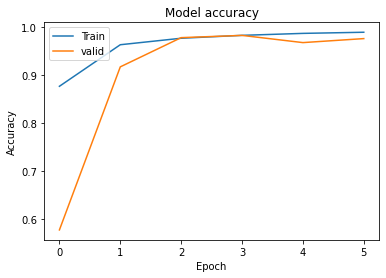

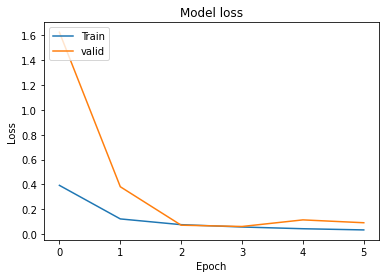

model Start date and time : 2020-09-24 22:09:25.267967
finish training date and time : 2020-09-24 22:37:28.596013
finish evaluation date and time : 2020-09-24 22:37:42.542149
save history date and time : 2020-09-24 22:37:43.150161
ResNet152_MNIST64_b16_ep20_fi0.25_bl5_fc0 - finish date and time : 2020-09-24 22:37:43.155152

ResNet152_MNIST64_b16_ep20_fi0.5_bl5_fc0 - start date and time : 2020-09-24 22:37:43.156154
[Load data. Done.] 
[Load Model. Done.] 
[Model Complie. Done.] 
[Training. Done.] 

loss_and_metrics : [8.577424771881104, 0.0981]


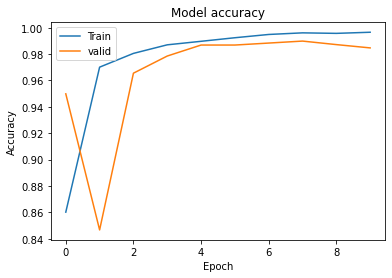

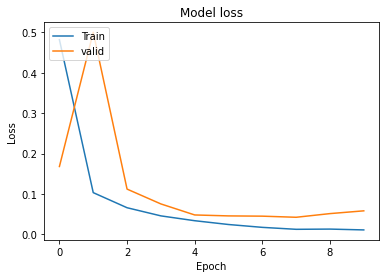

model Start date and time : 2020-09-24 22:37:43.158155
finish training date and time : 2020-09-24 23:32:17.514876
finish evaluation date and time : 2020-09-24 23:32:35.293880
save history date and time : 2020-09-24 23:32:35.964878
ResNet152_MNIST64_b16_ep20_fi0.5_bl5_fc0 - finish date and time : 2020-09-24 23:32:36.018883

ResNet152_MNIST64_b16_ep20_fi1_bl5_fc0 - start date and time : 2020-09-24 23:32:36.019880
[Load data. Done.] 
[Load Model. Done.] 
[Model Complie. Done.] 
[Training. Done.] 

loss_and_metrics : [6.724980216217041, 0.0939]


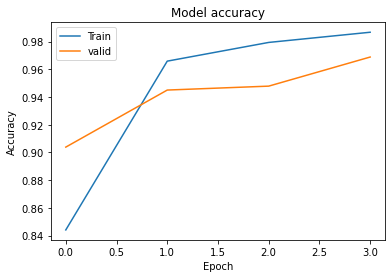

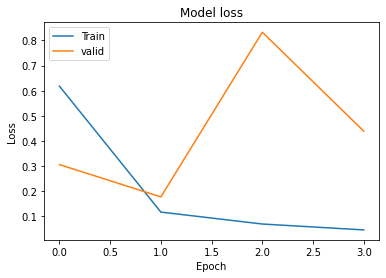

model Start date and time : 2020-09-24 23:32:36.022887
finish training date and time : 2020-09-25 09:16:18.855690
finish evaluation date and time : 2020-09-25 09:16:40.968079
save history date and time : 2020-09-25 09:16:41.604079
ResNet152_MNIST64_b16_ep20_fi1_bl5_fc0 - finish date and time : 2020-09-25 09:16:41.658085

ResNet152_MNIST64_b16_ep20_fi2_bl5_fc0 - start date and time : 2020-09-25 09:16:41.658085
[Load data. Done.] 
[Load Model. Done.] 
[Model Complie. Done.] 


KeyboardInterrupt: 

In [5]:
for model_name_elem in model_name:
    sys.stdout = sys_stdout_backup
    
    if(model_name_elem != 'ResNet152'):
#         break
        continue
    
    
    
    ab_type = ab_types[0]
#     num_filter = 1 # 2 ~ 1/64
    num_blocks = 5 # 2~6
    num_fullyCon = 0
    for n_filter in ResNet152_ablation_filt:
        num_filter = n_filter



        model_name_final = model_name_elem + '_' + data_name + str(image_size) + '_b'+str(batch) +'_ep'+str(epoch) + '_fi' + str(num_filter) + '_bl' + str(num_blocks) + '_fc' + str(num_fullyCon)
        start_time = datetime.now()
        print(model_name_final + " - start date and time : " + str(start_time))

        if(os.path.isdir(save_path + 'keras/'+ model_name_elem + ab_type + '/' ) != True):
            os.mkdir(save_path + 'keras/'+ model_name_elem + ab_type + '/' )  
    ###################################
    ######## start report Log
        # progress report
        ## model summary save
        reportLog = open(save_path + 'keras/' + model_name_elem + ab_type + '/'  + model_name_final + '_reportLog.txt', 'w')
        sys_stdout_backup = sys.stdout
        sys.stdout = reportLog

        try:
            keras_Model_Ablation.func_keras_Models(save_path, data_name, model_name_elem, image_size, channels, batch, epoch, sys_stdout_backup,
                                                   num_filter, num_blocks, num_fullyCon, n_classes, ab_type)
        except Exception as e:
            print(type(e),file=sys_stdout_backup)
            print('Error information: ', e ,file=sys_stdout_backup)

        sys.stdout = sys_stdout_backup
        reportLog.close()
    ########## Finish report Log
    ###################################

    #     cuda.select_device(0)
    #     cuda.close()

        tf.keras.backend.clear_session()
        finish_time = datetime.now()
        print(model_name_final + " - finish date and time : " + str(finish_time))
        print('')

ResNet152_MNIST64_b16_ep20_fi2_bl5_fc0 - start date and time : 2020-09-25 13:09:44.448504
[Load data. Done.] 
[Load Model. Done.] 
[Model Complie. Done.] 
Train on 58800 samples, validate on 1200 samples
Epoch 1/20
58800/58800 [==============================] - 1023s 17ms/sample - loss: 0.5115 - accuracy: 0.8841 - val_loss: 0.1008 - val_accuracy: 0.9708
Epoch 2/20
58800/58800 [==============================] - 988s 17ms/sample - loss: 0.1190 - accuracy: 0.9710 - val_loss: 0.2308 - val_accuracy: 0.9300
Epoch 3/20
58800/58800 [==============================] - 998s 17ms/sample - loss: 0.0657 - accuracy: 0.9815 - val_loss: 6.7932 - val_accuracy: 0.8375
[Training. Done.] 

loss_and_metrics : [6.712531792449951, 0.097]


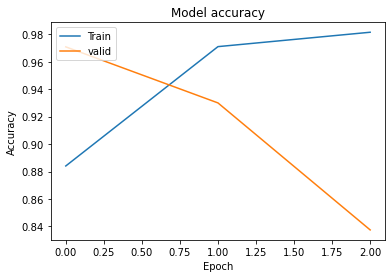

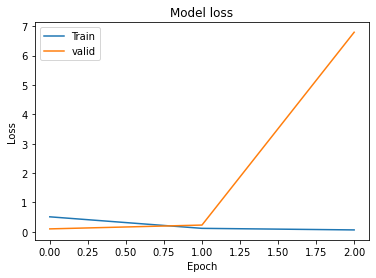

model Start date and time : 2020-09-25 13:09:44.450492
finish training date and time : 2020-09-25 14:00:13.770926
finish evaluation date and time : 2020-09-25 14:00:53.148446
save history date and time : 2020-09-25 14:00:53.840439
ResNet152_MNIST64_b16_ep20_fi2_bl5_fc0 - finish date and time : 2020-09-25 14:00:53.870441

ResNet152_MNIST64_b16_ep20_fi4_bl5_fc0 - start date and time : 2020-09-25 14:00:53.871436
[Load data. Done.] 
[Load Model. Done.] 
[Model Complie. Done.] 
Train on 58800 samples, validate on 1200 samples
Epoch 1/20
58800/58800 [==============================] - 2906s 49ms/sample - loss: 0.6717 - accuracy: 0.8771 - val_loss: 0.0981 - val_accuracy: 0.9742
Epoch 2/20
58800/58800 [==============================] - 2871s 49ms/sample - loss: 0.1424 - accuracy: 0.9655 - val_loss: 0.1311 - val_accuracy: 0.9608
Epoch 3/20
58800/58800 [==============================] - 2863s 49ms/sample - loss: 0.0857 - accuracy: 0.9786 - val_loss: 22.9958 - val_accuracy: 0.1875
[Training. Done.

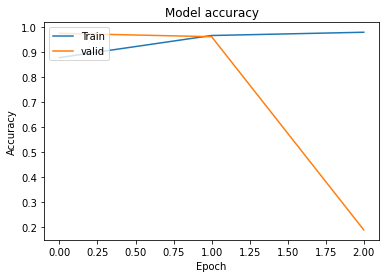

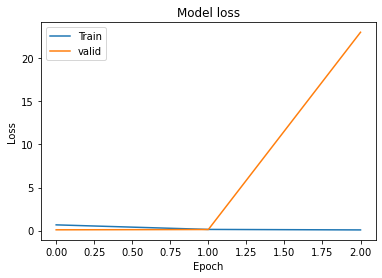

model Start date and time : 2020-09-25 14:00:53.873435
finish training date and time : 2020-09-25 16:25:21.359926
finish evaluation date and time : 2020-09-25 16:27:09.133936
save history date and time : 2020-09-25 16:27:09.785937
ResNet152_MNIST64_b16_ep20_fi4_bl5_fc0 - finish date and time : 2020-09-25 16:27:09.790928

ResNet152_MNIST64_b16_ep20_fi8_bl5_fc0 - start date and time : 2020-09-25 16:27:09.791935
[Load data. Done.] 
<class 'tensorflow.python.framework.errors_impl.ResourceExhaustedError'>
Error information:  OOM when allocating tensor with shape[3,3,2048,2048] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Mul] name: conv2d_56/kernel/Initializer/random_uniform/mul/
Model Error. skip
ResNet152_MNIST64_b16_ep20_fi8_bl5_fc0 - finish date and time : 2020-09-25 16:27:29.770855



In [5]:
temp = [2, 4,8]
for model_name_elem in model_name:
    sys.stdout = sys_stdout_backup
    
    if(model_name_elem != 'ResNet152'):
#         break
        continue
    
    
    
    ab_type = ab_types[0]
#     num_filter = 1 # 2 ~ 1/64
    num_blocks = 5 # 2~6
    num_fullyCon = 0
#     for n_filter in ResNet152_ablation_filt:
    for n_filter in temp:
        num_filter = n_filter



        model_name_final = model_name_elem + '_' + data_name + str(image_size) + '_b'+str(batch) +'_ep'+str(epoch) + '_fi' + str(num_filter) + '_bl' + str(num_blocks) + '_fc' + str(num_fullyCon)
        start_time = datetime.now()
        print(model_name_final + " - start date and time : " + str(start_time))

        if(os.path.isdir(save_path + 'keras/'+ model_name_elem + ab_type + '/' ) != True):
            os.mkdir(save_path + 'keras/'+ model_name_elem + ab_type + '/' )  
    ###################################
    ######## start report Log
        # progress report
        ## model summary save
        reportLog = open(save_path + 'keras/' + model_name_elem + ab_type + '/'  + model_name_final + '_reportLog.txt', 'w')
        sys_stdout_backup = sys.stdout
        sys.stdout = reportLog

        try:
            keras_Model_Ablation.func_keras_Models(save_path, data_name, model_name_elem, image_size, channels, batch, epoch, sys_stdout_backup, reportLog,
                                                   num_filter, num_blocks, num_fullyCon, n_classes, ab_type)
        except Exception as e:
            print(type(e),file=sys_stdout_backup)
            print('Error information: ', e ,file=sys_stdout_backup)

        sys.stdout = sys_stdout_backup
        reportLog.close()
    ########## Finish report Log
    ###################################

    #     cuda.select_device(0)
    #     cuda.close()

        tf.keras.backend.clear_session()
        finish_time = datetime.now()
        print(model_name_final + " - finish date and time : " + str(finish_time))
        print('')

In [6]:
for model_name_elem in model_name:
    sys.stdout = sys_stdout_backup
    
    if(model_name_elem != 'VGG19'):
#         break
        continue
    
    
    
    ab_type = ab_types[1]
#     num_filter = 1 # 2 ~ 1/64
#     num_blocks = 5 # 2~6
    num_fullyCon = 2
    for n_block in VGG19_ablation_filt:
        num_filter = n_filter 



        model_name_final = model_name_elem + '_' + data_name + str(image_size) + '_b'+str(batch) +'_ep'+str(epoch) + '_fi' + str(num_filter) + '_bl' + str(num_blocks) + '_fc' + str(num_fullyCon)
        start_time = datetime.now()
        print(model_name_final + " - start date and time : " + str(start_time))

        if(os.path.isdir(save_path + 'keras/'+ model_name_elem + ab_type + '/' ) != True):
            os.mkdir(save_path + 'keras/'+ model_name_elem + ab_type + '/' )  
    ###################################
    ######## start report Log
        # progress report
        ## model summary save
        reportLog = open(save_path + 'keras/' + model_name_elem + ab_type + '/'  + model_name_final + '_reportLog.txt', 'w')
        sys_stdout_backup = sys.stdout
        sys.stdout = reportLog

        
#         keras_Model_Ablation.func_keras_Models(save_path, data_name, model_name_elem, image_size, channels, batch, epoch, sys_stdout_backup,
#                                                    num_filter, num_blocks, num_fullyCon, n_classes, ab_type)
        try:
            keras_Model_Ablation.func_keras_Models(save_path, data_name, model_name_elem, image_size, channels, batch, epoch, sys_stdout_backup,reportLog,
                                                   num_filter, num_blocks, num_fullyCon, n_classes, ab_type)
        except Exception as e:
            print(type(e),file=sys_stdout_backup)
            print('Error information: ', e ,file=sys_stdout_backup)

        sys.stdout = sys_stdout_backup
        reportLog.close()
    ########## Finish report Log
    ###################################

    #     cuda.select_device(0)
    #     cuda.close()

        tf.keras.backend.clear_session()
        finish_time = datetime.now()
        print(model_name_final + " - finish date and time : " + str(finish_time))
        print('')

VGG19_MNIST64_b16_ep20_fi8_bl5_fc2 - start date and time : 2020-09-25 16:27:31.394855
[Load data. Done.] 
<class 'tensorflow.python.framework.errors_impl.ResourceExhaustedError'>
Error information:  OOM when allocating tensor with shape[3,3,4096,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Add] name: conv2d_15/kernel/Initializer/random_uniform/
Model Error. skip
VGG19_MNIST64_b16_ep20_fi8_bl5_fc2 - finish date and time : 2020-09-25 16:27:44.844184

VGG19_MNIST64_b16_ep20_fi8_bl5_fc2 - start date and time : 2020-09-25 16:27:44.845142
[Load data. Done.] 
<class 'tensorflow.python.framework.errors_impl.ResourceExhaustedError'>
Error information:  OOM when allocating tensor with shape[3,3,4096,4096] and type float on /job:localhost/replica:0/task:0/device:GPU:0 by allocator GPU_0_bfc [Op:Add] name: conv2d_15/kernel/Initializer/random_uniform/
Model Error. skip
VGG19_MNIST64_b16_ep20_fi8_bl5_fc2 - finish date and time : 2020-09-25 16:27:58.

In [7]:
# for model_name_elem in model_name:
#     sys.stdout = sys_stdout_backup
    
#     if(model_name_elem != 'VGG19'):
# #         break
#         continue
    
    
    
#     ab_type = ab_types[2]
#     num_filter = 1 # 2 ~ 1/64
#     num_blocks = 5 # 2~6
# #     num_fullyCon = 2
#     for n_fc in VGG19_ablation_fc:
#         num_fullyCon = n_fc   
# #         if(n_fc != 6):
# #             # break
# #             continue



#         if(os.path.isdir(save_path + 'keras/'+ model_name_elem + ab_type + '/' ) != True):
#             os.mkdir(save_path + 'keras/'+ model_name_elem + ab_type + '/' )  
#         model_name_final = model_name_elem + '_' + data_name + str(image_size) + '_b'+str(batch) +'_ep'+str(epoch) + '_fi' + str(num_filter) + '_bl' + str(num_blocks) + '_fc' + str(num_fullyCon)
#         start_time = datetime.now()
#         print(model_name_final + " - start date and time : " + str(start_time))


#     ###################################
#     ######## start report Log
#         # progress report
#         ## model summary save
#         reportLog = open(save_path + 'keras/' + model_name_elem + ab_type + '/'  + model_name_final + '_reportLog.txt', 'w')
#         sys_stdout_backup = sys.stdout
#         sys.stdout = reportLog

#         try:
#             keras_Model_Ablation.func_keras_Models(save_path, data_name, model_name_elem, image_size, channels, batch, epoch, sys_stdout_backup,
#                                                    num_filter, num_blocks, num_fullyCon, n_classes, ab_type)
#         except Exception as e:
#             print(type(e),file=sys_stdout_backup)
#             print('Error information: ', e ,file=sys_stdout_backup)

#         sys.stdout = sys_stdout_backup
#         reportLog.close()
#     ########## Finish report Log
#     ###################################

#     #     cuda.select_device(0)
#     #     cuda.close()

#         tf.keras.backend.clear_session()
#         finish_time = datetime.now()
#         print(model_name_final + " - finish date and time : " + str(finish_time))
#         print('')

In [7]:
tf.keras.backend.clear_session()

In [8]:
pyautogui.hotkey('ctrl', 's')

In [9]:
%autosave 60

Autosaving every 60 seconds


In [10]:
os.system('shutdown -s -t 180')

0

# Keras based model testbed

In [ ]:
datasize_name = data_name
datasize_name = data_name + '_' + str(img_size)
data_path = save_path +datasize_name + '/'
ext_npy = '.npy'

In [ ]:
### Load data
X_train = np.load(data_path + datasize_name + 'Xtrain' + ext_npy)
X_test = np.load(data_path + datasize_name + 'Xtest' + ext_npy)
y_train = np.load(data_path + datasize_name + 'ytrain' + ext_npy)
y_test = np.load(data_path + datasize_name + 'ytest' + ext_npy)



### Preprocessing
num_train,num_x, num_y = X_train.shape

X_train = X_train.astype(np.float32) / 255.0
X_test = X_test.astype(np.float32) / 255.0


y_train = tf.keras.utils.to_categorical(y_train, n_classes) ### label (class vector(integer) => binary class matrix): 범주형 인코딩
y_test = tf.keras.utils.to_categorical(y_test, n_classes) 
y_train = y_train.astype(np.int32) # label => 
y_test = y_test.astype(np.int32)

print("[Data information]==============")
print("================================")
print('X_train information: '+ str(X_train.shape))
print('X_test information: '+ str(X_test.shape))
print("===")
if (ch == 1):
    X_train = np.stack((X_train,)*3, axis=-1)
    X_test = np.stack((X_test,)*3, axis=-1)
    print('X_train gray2rgb information: '+str(X_train.shape))
    print('X_test gray2rgb information: '+str(X_test.shape))
print("================================")

In [ ]:
def_input = Input(shape=(img_size,img_size,3))

In [ ]:
# (img_size = 64, num_filter = 1, num_blocks = 5, num_fullyCon = 2, number_classes = 10)
# img_size = 
num_filter = 1/64 # 2 ~ 1/64
num_blocks = 5 # 2~6
num_fullyCon = 5
number_classes = n_classes

In [ ]:
# VGG 19
tf.keras.backend.clear_session()

model = models.Sequential()

start_filter = 64
# Block 1
if (num_blocks > 1):
    model.add(layers.Conv2D(filters=int(start_filter*num_filter), kernel_size=(3,3), strides=(1,1), activation='relu', padding="same", 
                            input_shape=(image_size,image_size,3)))
    model.add(layers.Conv2D(filters=int(start_filter*num_filter), kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Block 2
if (num_blocks > 2):
    model.add(layers.Conv2D(filters=int(2*start_filter*num_filter), kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(layers.Conv2D(filters=int(2*start_filter*num_filter), kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Block 3
if (num_blocks > 3):
    for j in range(4):
        model.add(layers.Conv2D(filters=int((2**2)*start_filter*num_filter), kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

# Block Loop
for i in range (3,num_blocks): # 64ch * 8 fixed on paper.
    for j in range(4):
        model.add(layers.Conv2D(filters=int((2**3)*start_filter*num_filter), kernel_size=(3,3), strides=(1,1), activation='relu', padding="same"))
    model.add(layers.MaxPool2D(pool_size=(2,2), strides=(2,2)))

model.add(layers.Flatten())
for i in range(num_fullyCon): 
    model.add(layers.Dense(4096, activation='relu'))
    model.add(layers.Dropout(0.5))

model.add(layers.Dense(number_classes, activation='softmax'))


In [ ]:
# model.summary()